In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/white-wine-quality/winequality.names
/kaggle/input/white-wine-quality/winequality-white.csv


> # Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Import the dataset
wine_df = pd.read_csv('../input/white-wine-quality/winequality-white.csv', sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The description of each features (excluding the output):

*  ***volatile acidity***: Volatile acidity is the gaseous acids present in wine.
*  ***fixed acidity***: Primary fixed acids found in wine are tartaric, succinic, citric, and malic.
*  ***residual sugar***: Amount of sugar left after fermentation.
*  ***citric acid***: It is weak organic acid, found in citrus fruits naturally.
*  ***chlorides***: Amount of salt present in wine.
*  ***free sulfur dioxide***: So2 is used for prevention of wine by oxidation and microbial spoilage.
*  ***total sulfur dioxide***
*  ***pH***: In wine pH is used for checking acidity
*  ***density***
*  ***sulphates***: Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
*  ***alchohol***: Percent of alcohol present in wine. 

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [6]:
wine_df.shape

(4898, 12)

In [7]:
# separate the features and target variable
feat_df = wine_df.drop(columns=['quality'])
print(feat_df.head())

target = wine_df['quality']
print(target.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
0    6
1

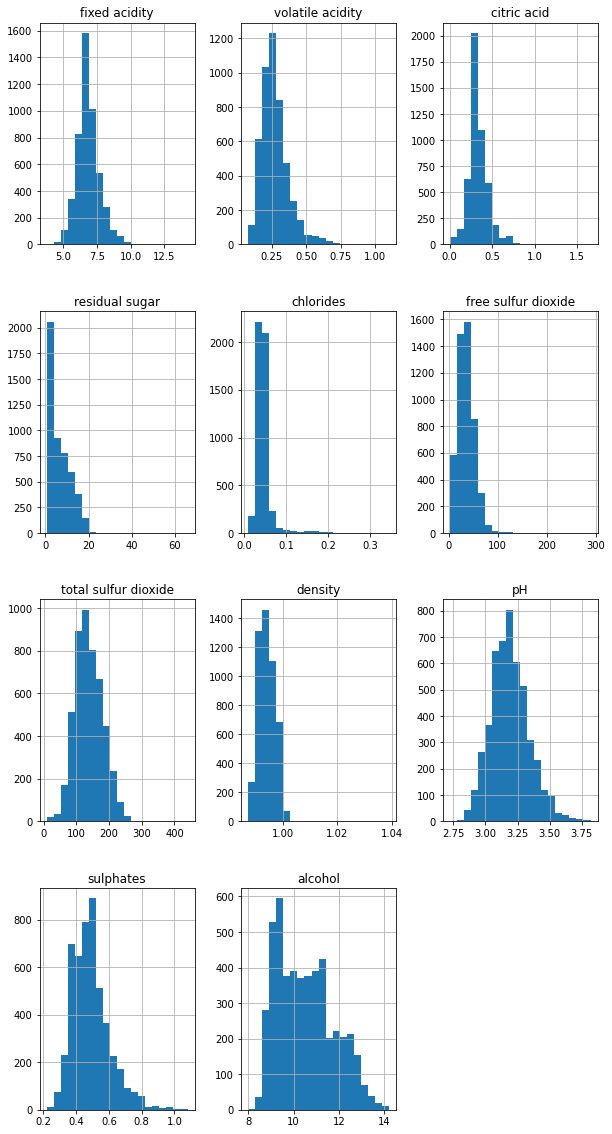

In [8]:
# Plot distribution of each features
feat_df.hist(bins=20, figsize=(10,20))
plt.show()

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

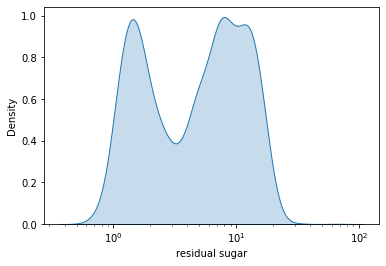

In [9]:
sns.kdeplot(x='residual sugar', fill=True, log_scale=True ,data=feat_df)

<AxesSubplot:>

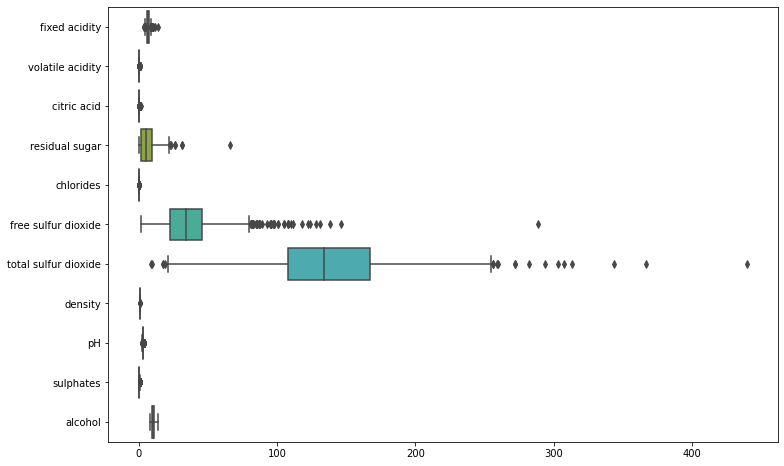

In [10]:
# Plot the boxplot for each features
plt.figure(figsize=(12,8))
sns.boxplot(data=feat_df, orient='h')

Outliers almost occurs in each features, let's explore further 

<AxesSubplot:xlabel='pH'>

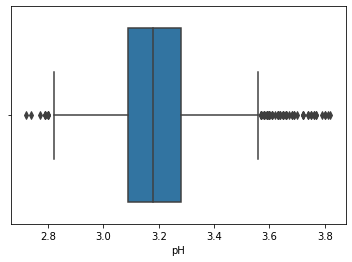

In [11]:
sns.boxplot(x='pH', data=feat_df)

<AxesSubplot:xlabel='density'>

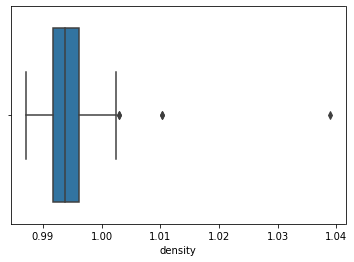

In [12]:
sns.boxplot(x='density', data=feat_df)

<AxesSubplot:xlabel='chlorides'>

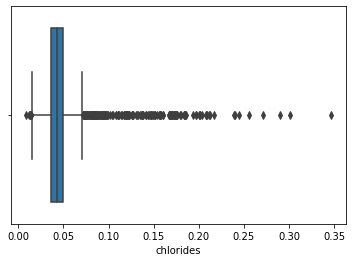

In [13]:
sns.boxplot(x='chlorides', data=feat_df)

(array([0, 1, 2]),
 [Text(0, 0, 'volatile acidity'),
  Text(1, 0, 'citric acid'),
  Text(2, 0, 'sulphates')])

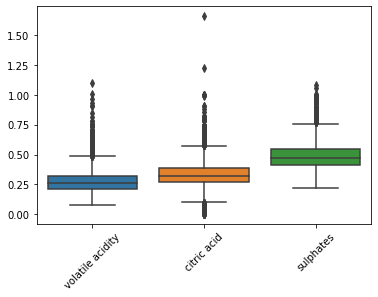

In [14]:
small_df = feat_df[['volatile acidity', 'citric acid', 'sulphates']]

# Plot small range feature 
sns.boxplot(data=small_df, orient='v')
plt.xticks(rotation=45)

Each boxplot shows outliers on each features. Let's see if the outliers are affectiong the correlation

<AxesSubplot:>

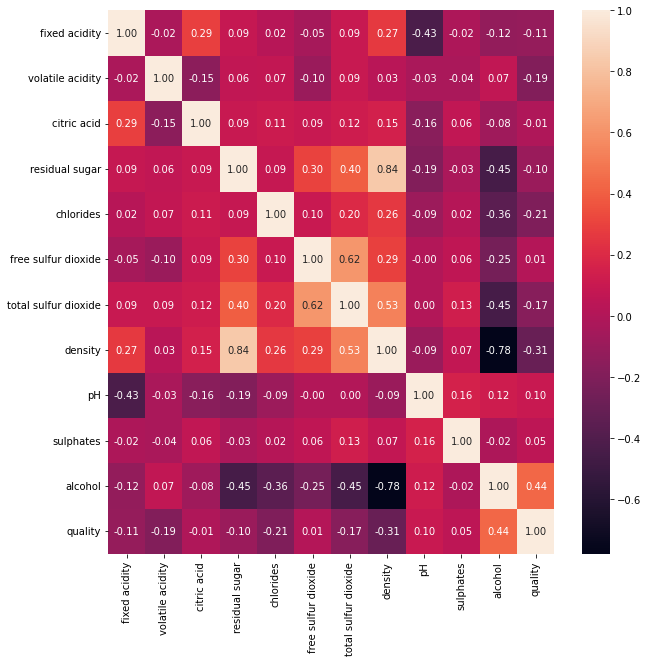

In [15]:
# Plot heatmap for entire dataset
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(), annot=True, fmt='.2f')

From the above heatmaps shows residual sugar and density are positively highly correlated **(0.84)** and alchohol and density are negatively highly corelated **(-0.78)**.

Other features worth mentioning that correlated (either positive or negative) are:
* total sulfur dioxide and free sulfur dioxide **(0.62)**
* density and total sulfur dioxide **(0.53)**
* quality and alcohol **(0.44)**
* fixed axidity and pH **(-0.43)**
* residual sugar and alcohol **(-0.45)**
* total sulfur dioxide and alcohol **(-0.45)**

The result of the heatmap may occur because outliers from every features. Thus, almost every features are weak correlated.

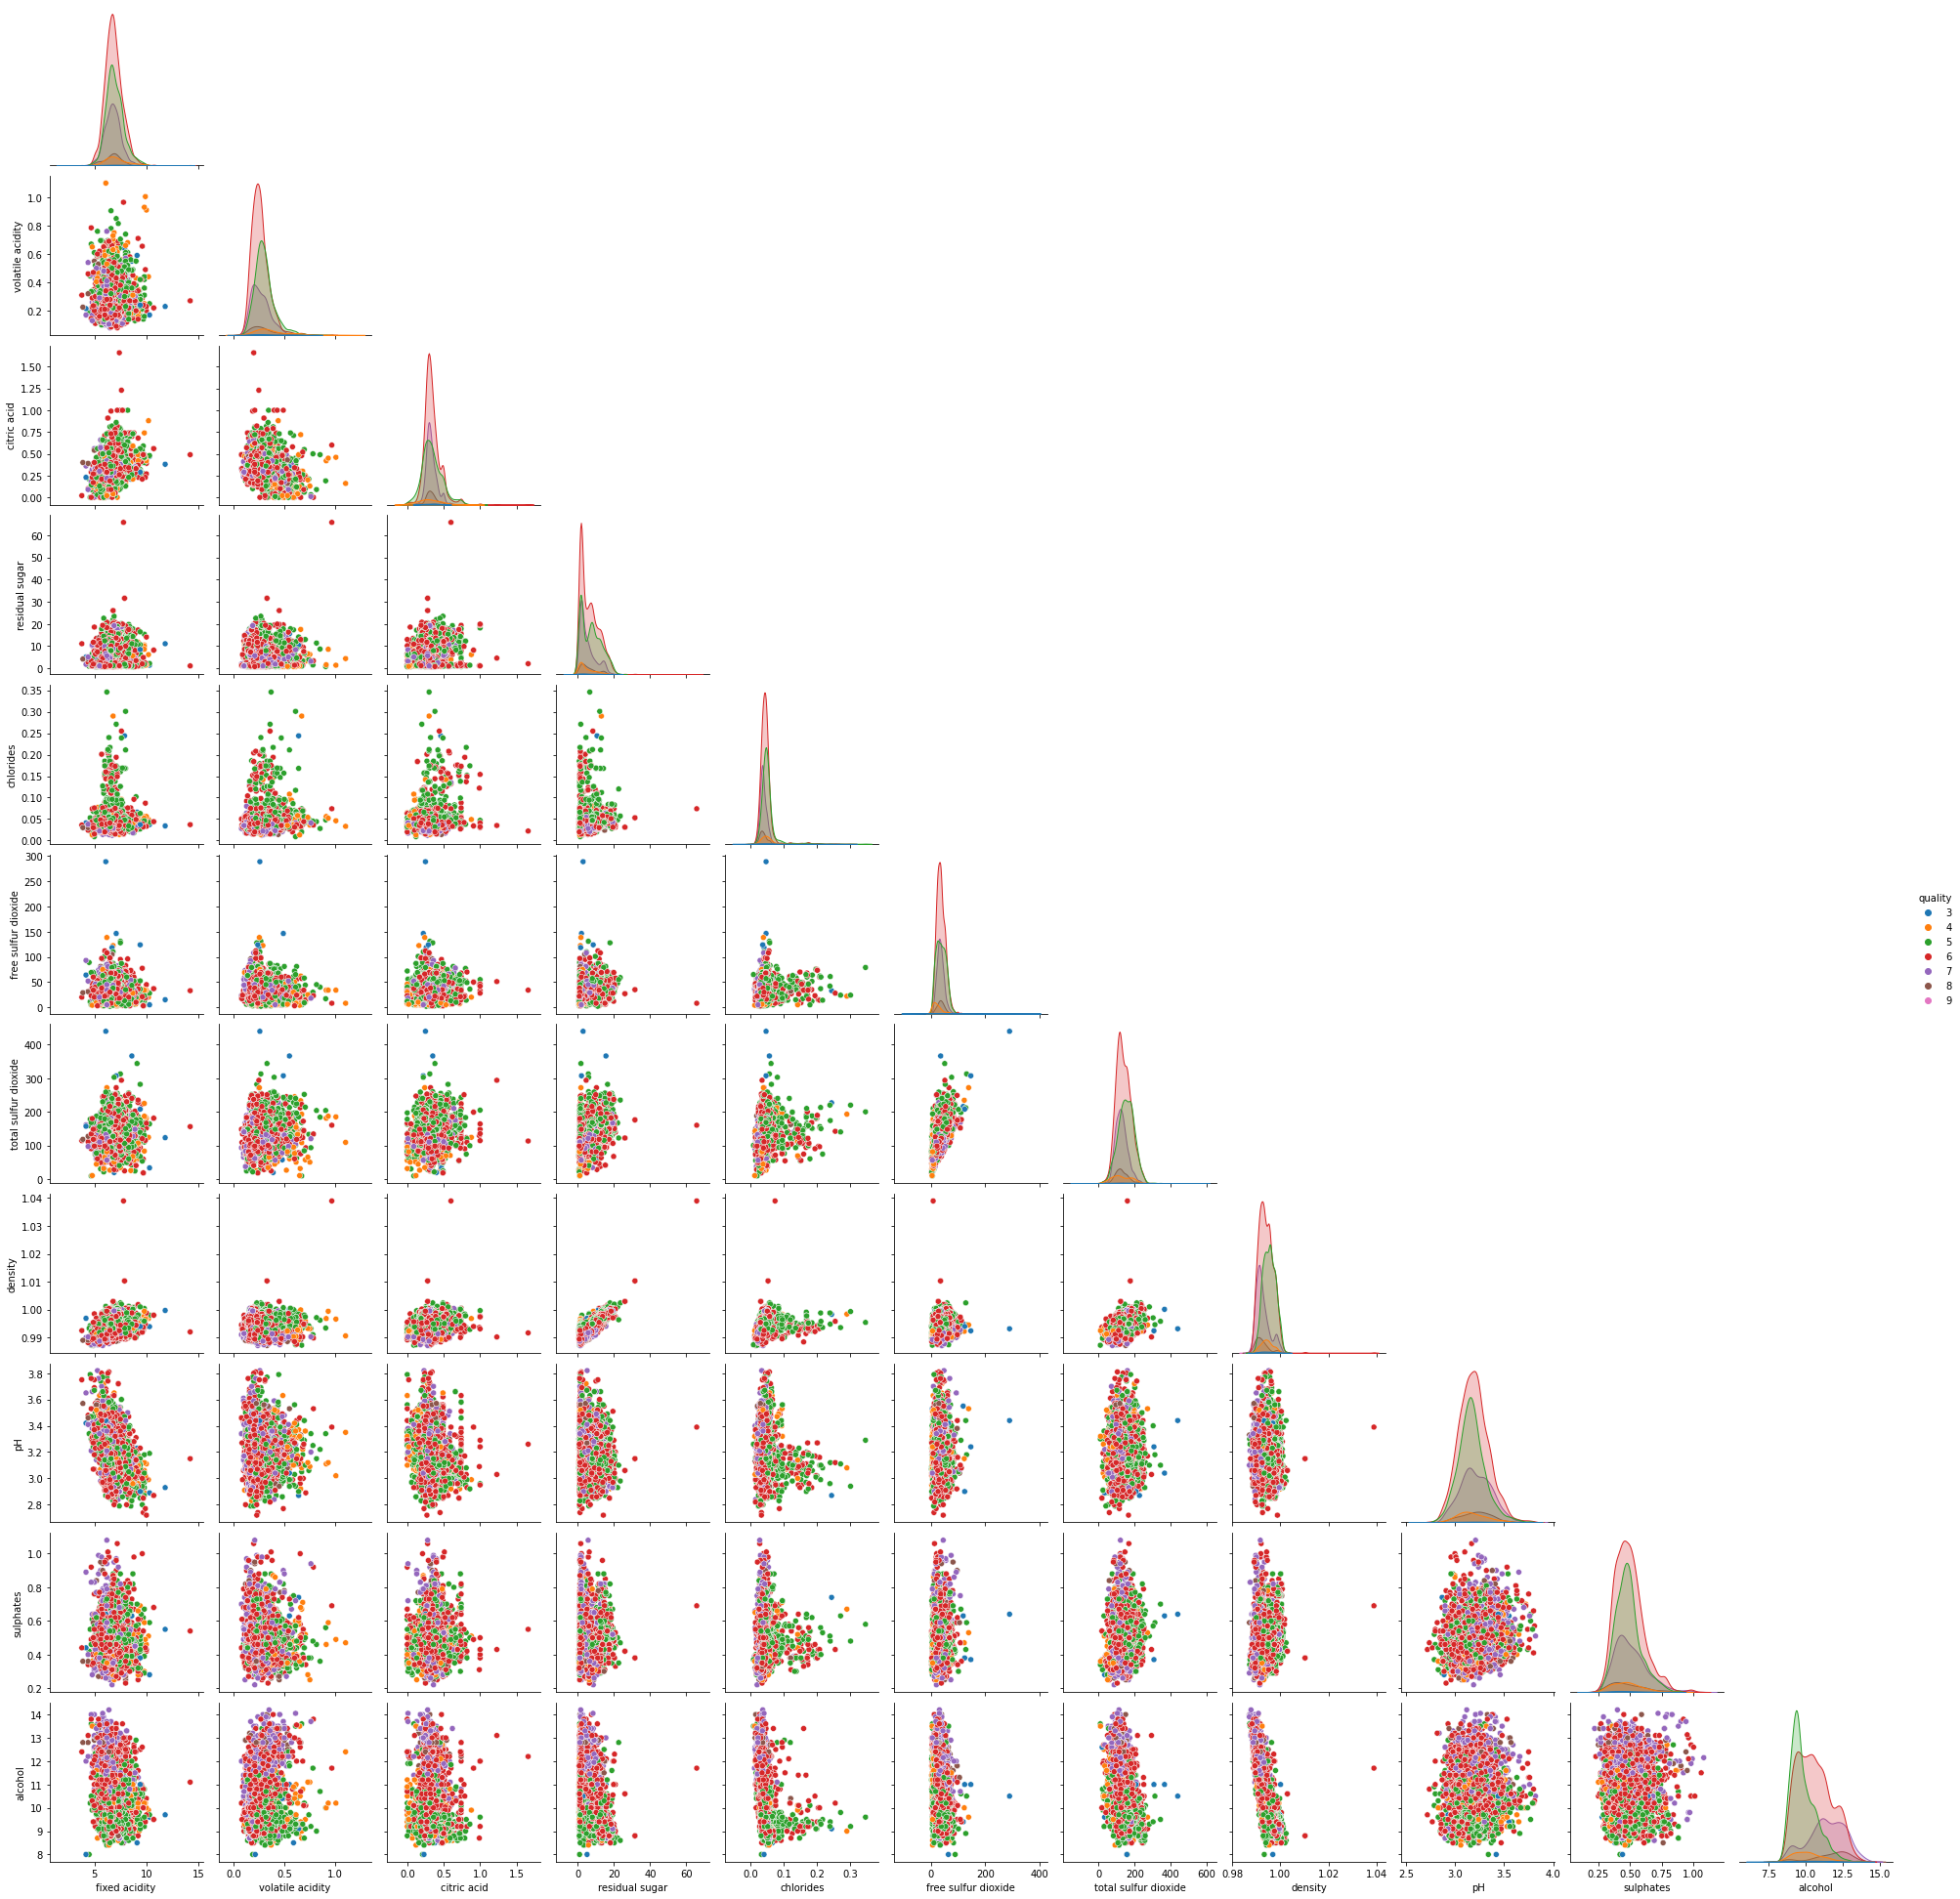

In [16]:
# Pair plot 
sns.pairplot(data=wine_df, hue='quality', palette='tab10', corner=True)

<AxesSubplot:xlabel='quality', ylabel='Count'>

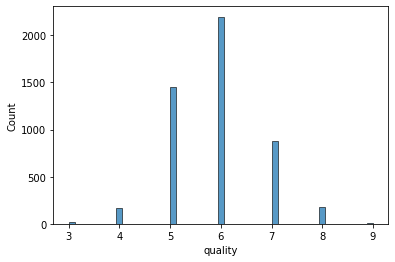

In [17]:
# Plot the target 
sns.histplot(data=target)

In [18]:
wine_df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [19]:
target.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

# Preprocessing

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import RobustScaler, LabelEncoder

In [21]:
# Normalise the features
scaler = RobustScaler()
feat_df_norm = scaler.fit_transform(feat_df)
print(feat_df_norm)

[[ 0.2         0.09090909  0.33333333 ... -0.94736842 -0.14285714
  -0.84210526]
 [-0.5         0.36363636  0.16666667 ...  0.63157895  0.14285714
  -0.47368421]
 [ 1.3         0.18181818  0.66666667 ...  0.42105263 -0.21428571
  -0.15789474]
 ...
 [-0.3        -0.18181818 -1.08333333 ... -1.         -0.07142857
  -0.52631579]
 [-1.3         0.27272727 -0.16666667 ...  0.84210526 -0.64285714
   1.26315789]
 [-0.8        -0.45454545  0.5        ...  0.42105263 -1.07142857
   0.73684211]]


In [22]:
# Change the label of corresponding target variable
encoder = LabelEncoder()
target_enc = encoder.fit_transform(target)
print({index: label for index,label in enumerate(encoder.classes_)})

{0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8, 6: 9}


In [23]:
X = feat_df_norm
y = target_enc
print(X.shape, y.shape)

(4898, 11) (4898,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, stratify=y, random_state=12)

print('Shape of X_train, y_train: {xtrain}, {ytrain}'.format(xtrain=X_train.shape, ytrain=y_train.shape))
print('Shape of X_test, y_test: {xtest}, {ytest}'.format(xtest=X_test.shape, ytest=y_test.shape))

Shape of X_train, y_train: (3281, 11), (3281,)
Shape of X_test, y_test: (1617, 11), (1617,)


# Reggresion Model

We will train and use cross-validation to get better score overall

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
import tensorflow as tf

from sklearn.model_selection import RandomizedSearchCV

The list of regression model and corresponding score that will be used:
* Linear Regression **(74.535%)**
* KNN **(62.987%)**
* SVM
* Decision Tree
* Random Forest
* Ridge Reggresion
* Lasso Reggresion
* Gaussian Reggresion
* Polynomial Reggresion
* Neural Network

In [62]:
def evaluate_model(X_train, y_train, model, splits=3):
    cv = RepeatedStratifiedKFold(n_splits=splits, n_repeats=5, random_state=10)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=2)
    return scores

In [35]:
def test_model(model, X_train, y_train, X_test, y_test):
    model = model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    
    # Score result
    mse_res = mean_squared_error(y_test, yhat)
    rmse_res= mean_squared_error(y_test, yhat, squared=False)
    mae_res = mean_absolute_error(y_test, yhat)
    
    print('MSE Score: ', round(mse_res*100, 3))
    print('RMSE Score: ', round(rmse_res*100, 3))
    print('MAE Score: ', round(mae_res*100, 3))
    return None

## Linear Regression

In [27]:
linreg = LinearRegression()
lr_score = evaluate_model(X_train, y_train, model=linreg)
print('Score on train test: ', lr_score)

Score on train test:  [-0.56488243 -0.58510298 -0.58771241 -0.62045537 -0.56058704 -0.54537113
 -0.59281659 -0.55617403 -0.57765323 -0.55667362 -0.6232889  -0.56703544
 -0.55004017 -0.6183545  -0.55677525]


In [36]:
# Result on test set
test_model(linreg, X_train, y_train, X_test, y_test)

MSE Score:  55.554
RMSE Score:  74.535
MAE Score:  58.055


## KNN

In [73]:
params_grid = {'n_neighbors': range(1,51),
              'weights': ['uniform', 'distance']}

knn_rand = RandomizedSearchCV(estimator= KNeighborsRegressor(),
                             param_distributions=params_grid,
                             scoring='neg_mean_squared_error',
                             n_jobs=-1, random_state=20)
knn_rand = knn_rand.fit(X_train, y_train)

In [74]:
print(knn_rand.best_estimator_)

KNeighborsRegressor(n_neighbors=25, weights='distance')


I'll use the weights parameters, for n_neighbors I will try to run it manually

In [63]:
#Try all n_neigbors parameter from 1-50
knn_res = []
for n in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=n, weights='distance')
    
    knn_scores = evaluate_model(X_train, y_train, model=knn)
    knn_res.append(np.mean(knn_scores)*100)
    print('>%d %.3f (%.3f)' % (n, np.mean(knn_scores)*100, np.std(knn_scores)))
print("Skor validasi tertinggi: ", round(max(knn_res),3))

>1 -74.746 (0.034)
>2 -59.030 (0.023)
>3 -53.071 (0.018)
>4 -50.047 (0.016)
>5 -48.337 (0.018)
>6 -47.224 (0.018)
>7 -46.652 (0.017)
>8 -46.158 (0.014)
>9 -45.841 (0.015)
>10 -45.665 (0.015)
>11 -45.542 (0.015)
>12 -45.512 (0.014)
>13 -45.438 (0.015)
>14 -45.481 (0.016)
>15 -45.544 (0.016)
>16 -45.622 (0.017)
>17 -45.612 (0.017)
>18 -45.579 (0.016)
>19 -45.636 (0.016)
>20 -45.659 (0.017)
>21 -45.703 (0.017)
>22 -45.705 (0.017)
>23 -45.654 (0.017)
>24 -45.658 (0.017)
>25 -45.671 (0.017)
>26 -45.687 (0.017)
>27 -45.647 (0.016)
>28 -45.616 (0.016)
>29 -45.595 (0.015)
>30 -45.612 (0.016)
>31 -45.570 (0.015)
>32 -45.572 (0.015)
>33 -45.590 (0.015)
>34 -45.626 (0.015)
>35 -45.680 (0.016)
>36 -45.674 (0.015)
>37 -45.708 (0.016)
>38 -45.777 (0.015)
>39 -45.804 (0.015)
>40 -45.838 (0.015)
>41 -45.861 (0.015)
>42 -45.870 (0.015)
>43 -45.914 (0.015)
>44 -45.962 (0.015)
>45 -46.004 (0.015)
>46 -46.051 (0.015)
>47 -46.078 (0.015)
>48 -46.098 (0.015)
>49 -46.118 (0.015)
>50 -46.119 (0.015)
Skor vali

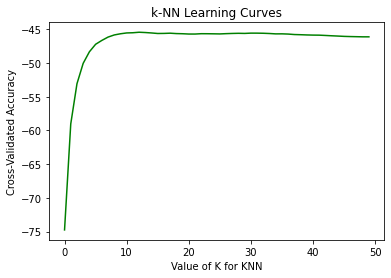

In [75]:
# plot knn validation
k_range = [i for i in range(len(knn_res))]
plt.plot(k_range, knn_res, color='green');
plt.title('k-NN Learning Curves')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [70]:
# Fit the best KNN
knn = KNeighborsRegressor(n_neighbors=13, weights='distance')
knn_score = evaluate_model(X_train, y_train, model=knn)
print('Score on train test: ', knn_score)

Score on train test:  [-0.46209917 -0.45236981 -0.42216613 -0.46523509 -0.45636634 -0.4496689
 -0.47203266 -0.440401   -0.48554277 -0.43226264 -0.46321899 -0.45187247
 -0.45791458 -0.46008723 -0.44443545]


In [71]:
test_model(knn, X_train, y_train, X_test, y_test)

MSE Score:  39.674
RMSE Score:  62.987
MAE Score:  41.528


## SVM Regressor